In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv(r"C:\Users\pc\Downloads\DataSets-master (1)\DataSets-master\500_Person_Gender_Height_Weight_Index.csv")

In [6]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,500.0,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,106.000,32.382607,50.0,80.0,106.0,136.0,160.0
Index,500.0,3.748,1.355053,0.0,3.0,4.0,5.0,5.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


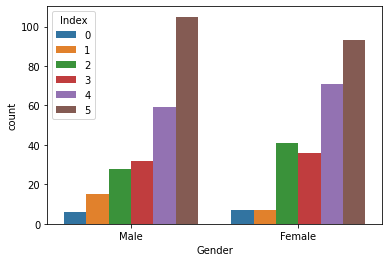

In [9]:
sns.countplot(x="Gender",data=data,hue="Index")
plt.show()

# counting male and female

In [10]:
gen = data["Gender"].value_counts()

In [11]:
gen.values[0]

255

In [12]:
type(gen.values[0])

numpy.int64

# Separation between feature and target

In [13]:
fea = data.iloc[:,:3]
tar = data.iloc[:,3]

In [14]:
type(tar)


pandas.core.series.Series

In [15]:
type(fea)

pandas.core.frame.DataFrame

# replace {male:1,female:0}

In [16]:
fea.Gender = fea.Gender.map({"Male":1,"Female":0}) 

In [17]:
fea["Gender"].value_counts()

0    255
1    245
Name: Gender, dtype: int64

# converting series, data frame into array

In [18]:
fea = fea.values
tar = tar.values

In [19]:
type(fea)

numpy.ndarray

# spliting into 70:30 (train & test)

In [20]:
n = int(len(data)*0.70)

In [21]:
type(n)

int

In [22]:
fea_train = fea[:n]
fea_test = fea[n:]
tar_train = tar[:n]
tar_test = tar[n:]

In [23]:
print(" shape of fea_train is {} and shape of fea_test {}".format(fea_train.shape,fea_test.shape))
print(" shape of tar_train is {} and shape of tar_test {}".format(tar_train.shape,tar_test.shape))

 shape of fea_train is (350, 3) and shape of fea_test (150, 3)
 shape of tar_train is (350,) and shape of tar_test (150,)


# training the model using knn algo

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_trainer = KNeighborsClassifier(n_neighbors=5)  # by_default
knn_learner = knn_trainer.fit(fea_train,tar_train)

In [26]:
index_result = pd.Series(["extremely weak","weak","normal","overweight","obesity","extreme obesity"])
i = knn_learner.predict([[1,162,65]])
index_result[i]


2    normal
dtype: object

# testing the model (tar_test>>tar_p ) for fea_test

In [27]:
tar_actual = tar_test
tar_p = knn_learner.predict(fea_test)

In [28]:
actual_vs_predict = pd.DataFrame({"actual":list(tar_actual),"predicted":list(tar_p)})

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy = accuracy_score(tar_p,tar_actual)

In [31]:
accuracy

0.9333333333333333

# finding maximum value of k and range

In [32]:
kmax= int(np.sqrt(len(fea_train))) + 1     #because range is excluded type

In [33]:
krange= list(range(1,kmax))

In [34]:
krange

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# finding effective valuer of  k

In [35]:
acc_list = []
for i in range(1,kmax):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    model_learner = knn_model.fit(fea_train,tar_train)
    ypmodel = model_learner.predict(fea_test)
    model_acc = accuracy_score(tar_test,ypmodel)
    print("accuracy of k{} is {}".format(i,model_acc))
    acc_list.append(model_acc)

accuracy of k1 is 0.9
accuracy of k2 is 0.9133333333333333
accuracy of k3 is 0.8933333333333333
accuracy of k4 is 0.9333333333333333
accuracy of k5 is 0.9133333333333333
accuracy of k6 is 0.9133333333333333
accuracy of k7 is 0.9133333333333333
accuracy of k8 is 0.9066666666666666
accuracy of k9 is 0.9266666666666666
accuracy of k10 is 0.9066666666666666
accuracy of k11 is 0.9
accuracy of k12 is 0.92
accuracy of k13 is 0.9133333333333333
accuracy of k14 is 0.92
accuracy of k15 is 0.88
accuracy of k16 is 0.8933333333333333
accuracy of k17 is 0.8933333333333333
accuracy of k18 is 0.9066666666666666


In [36]:
print("max accuracy is ",np.array(acc_list).max())
print("k is  ",np.array(acc_list).argmax()+1)

max accuracy is  0.9333333333333333
k is   4


# graph visualizing maximum value of k

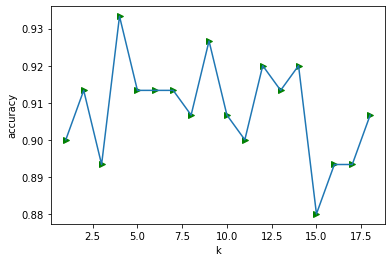

In [37]:
plt.plot(krange,acc_list,'g>')
plt.plot(krange,acc_list)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

# putting accurate value of k 

In [41]:
knn_trainer = KNeighborsClassifier(n_neighbors=4)  # by_default
knn_learner = knn_trainer.fit(fea_train,tar_train)
index_result = pd.Series(["extremely weak","weak","normal","overweight","obesity","extreme obesity"])
i = knn_learner.predict([[1,162,65]])
index_result[i].values[0]

'normal'

# now the updated accuracy

In [42]:
tar_actual = tar_test
tar_p = knn_learner.predict(fea_test)
accuracy = accuracy_score(tar_p,tar_actual)

In [43]:
accuracy

0.9333333333333333